# Problem Statement

# CART-RF-ANN :- An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Dataset for Problem 2: insurance_part2_data-1.csv




### Data Dictionary

1. Target: Claim Status (Claimed)

2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Distribution channel of tour insurance agencies (Channel)

5. Name of the tour insurance products (Product)

6. Duration of the tour (Duration)

7. Destination of the tour (Destination)

8. Amount of sales of tour insurance policies (Sales)

9. The commission received for tour insurance firm (Commission)

10. Age of insured (Age)

### Importing libraries and Loading data

In [160]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [161]:
ins_df = pd.read_csv("insurance_part2_data.csv")

##  Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.
### Checking the Head of the data & EDA

In [162]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Checking Shape of the Data

In [163]:
ins_df.shape

(3000, 10)

In [164]:
ins_df.describe(include = "all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [165]:
duplicate = ins_df.duplicated()
duplicate.sum()

139

In [166]:
ins_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


many columns are of type object i.e. strings. These need to be converted to ordinal type

### Null Value Condition Check

In [167]:
ins_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### Creating Distribution as well as boxplot to check distibution of numerical data  

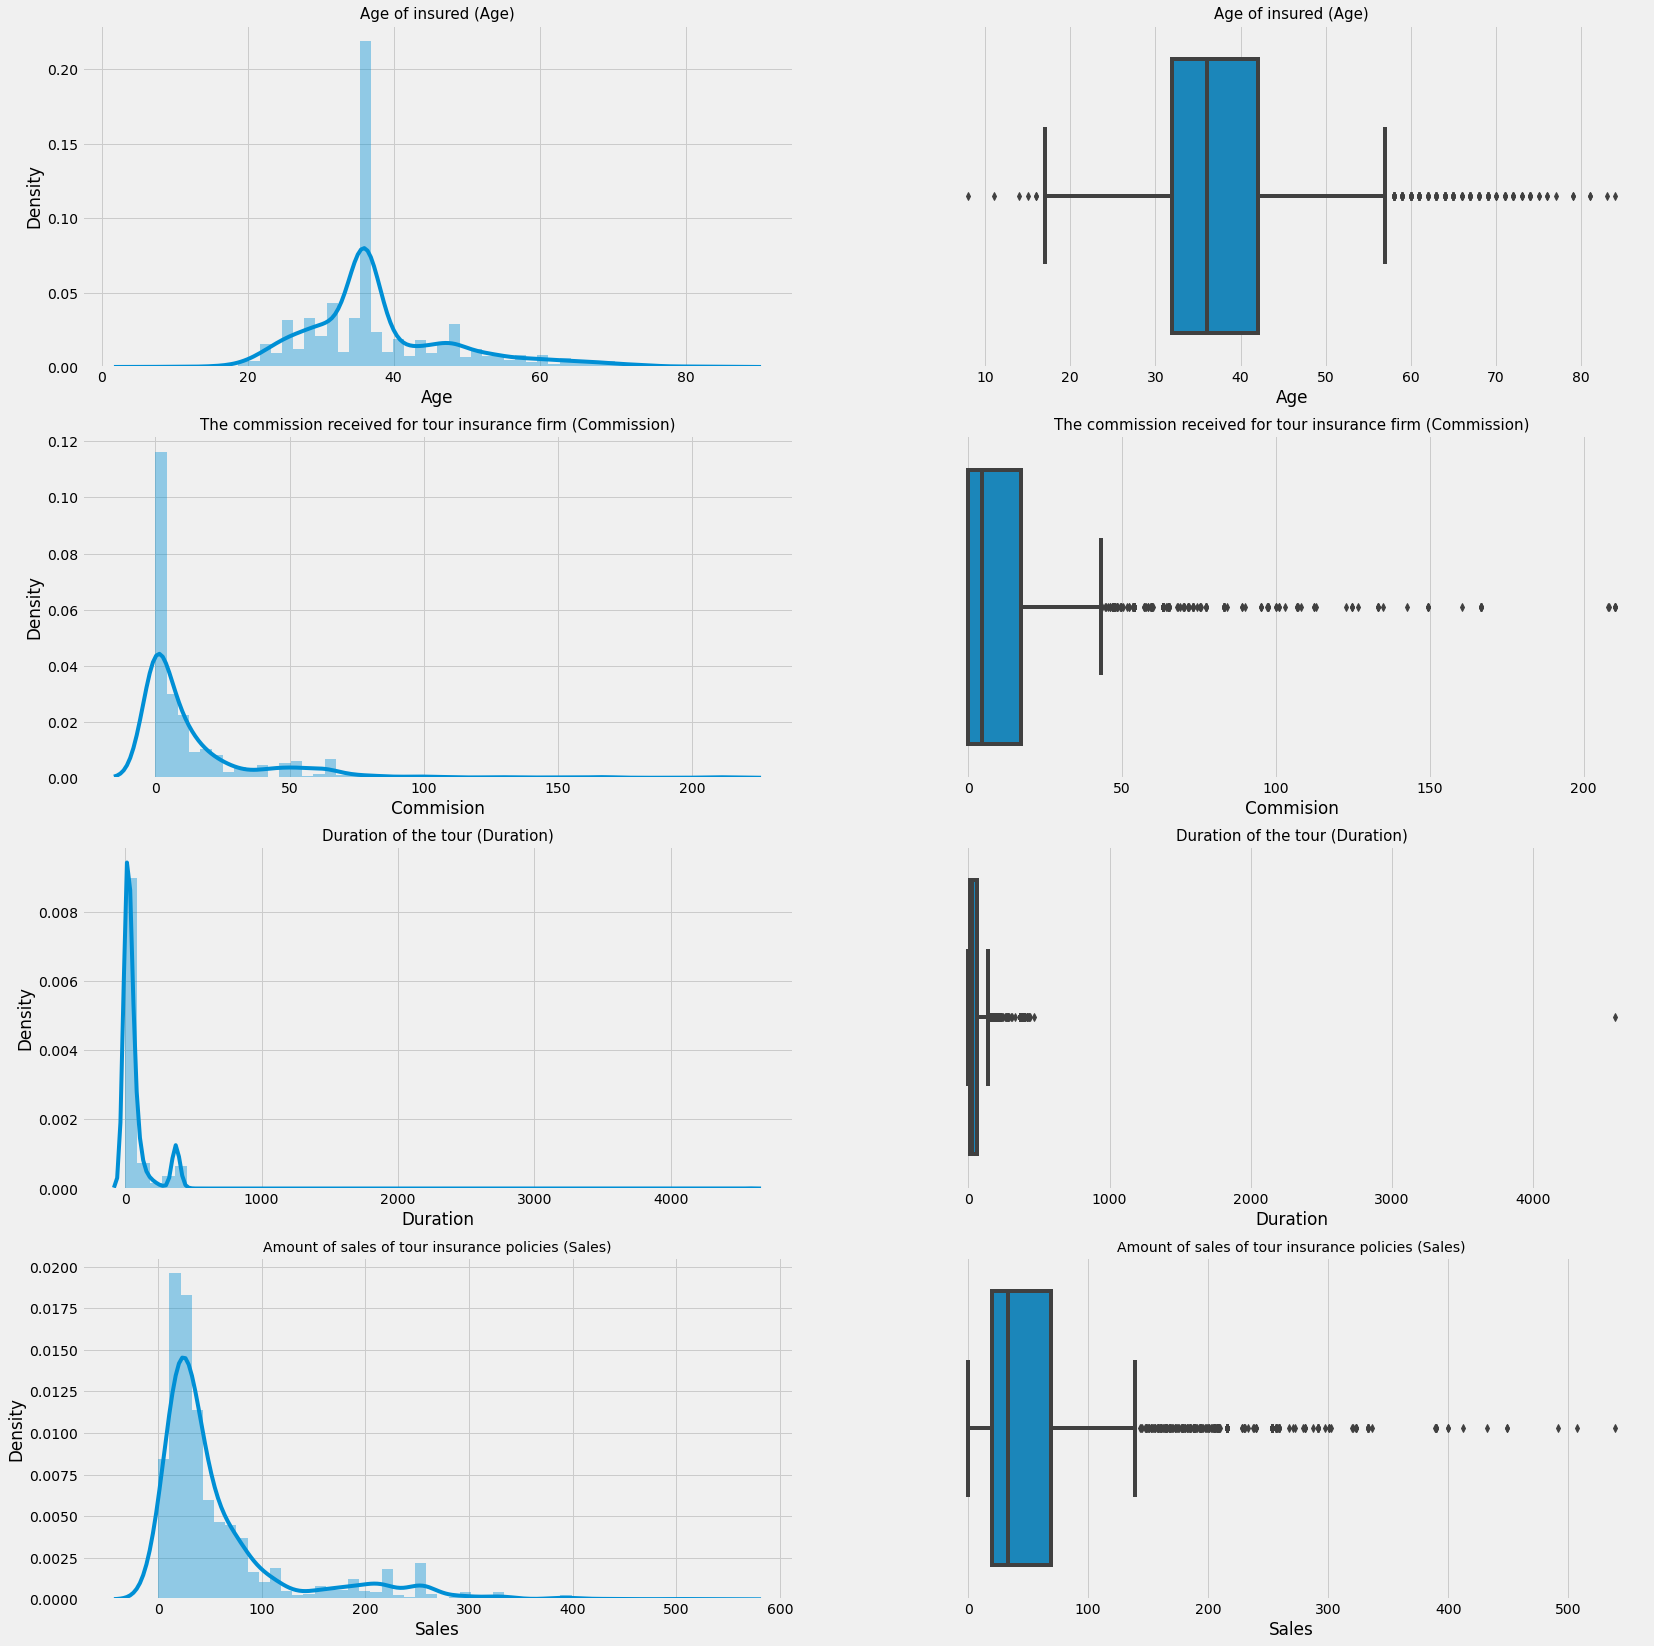

In [168]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(25, 27)
a = sns.distplot(ins_df['Age'] , ax=axes[0][0])
a.set_title("Age of insured (Age)",fontsize=15)
a = sns.boxplot(ins_df['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age of insured (Age)",fontsize=15)

a = sns.distplot(ins_df['Commision'] , ax=axes[1][0])
a.set_title("The commission received for tour insurance firm (Commission)",fontsize=15)


a = sns.boxplot(ins_df['Commision'] , orient = "v" , ax=axes[1][1])
a.set_title("The commission received for tour insurance firm (Commission)",fontsize=15)

a = sns.distplot(ins_df['Duration'] , ax=axes[2][0])
a.set_title("Duration of the tour (Duration)",fontsize=15)

a = sns.boxplot(ins_df['Duration'] , orient = "v" , ax=axes[2][1])
a.set_title("Duration of the tour (Duration)",fontsize=15)


a = sns.distplot(ins_df['Sales'] ,ax=axes[3][0])
a.set_title("Amount of sales of tour insurance policies (Sales)",fontsize=14)

a = sns.boxplot(ins_df['Sales'] , orient = "v" , ax=axes[3][1])
a.set_title("Amount of sales of tour insurance policies (Sales)",fontsize=14)

plt.show();

In [182]:
ins_df.Agency_Code.value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

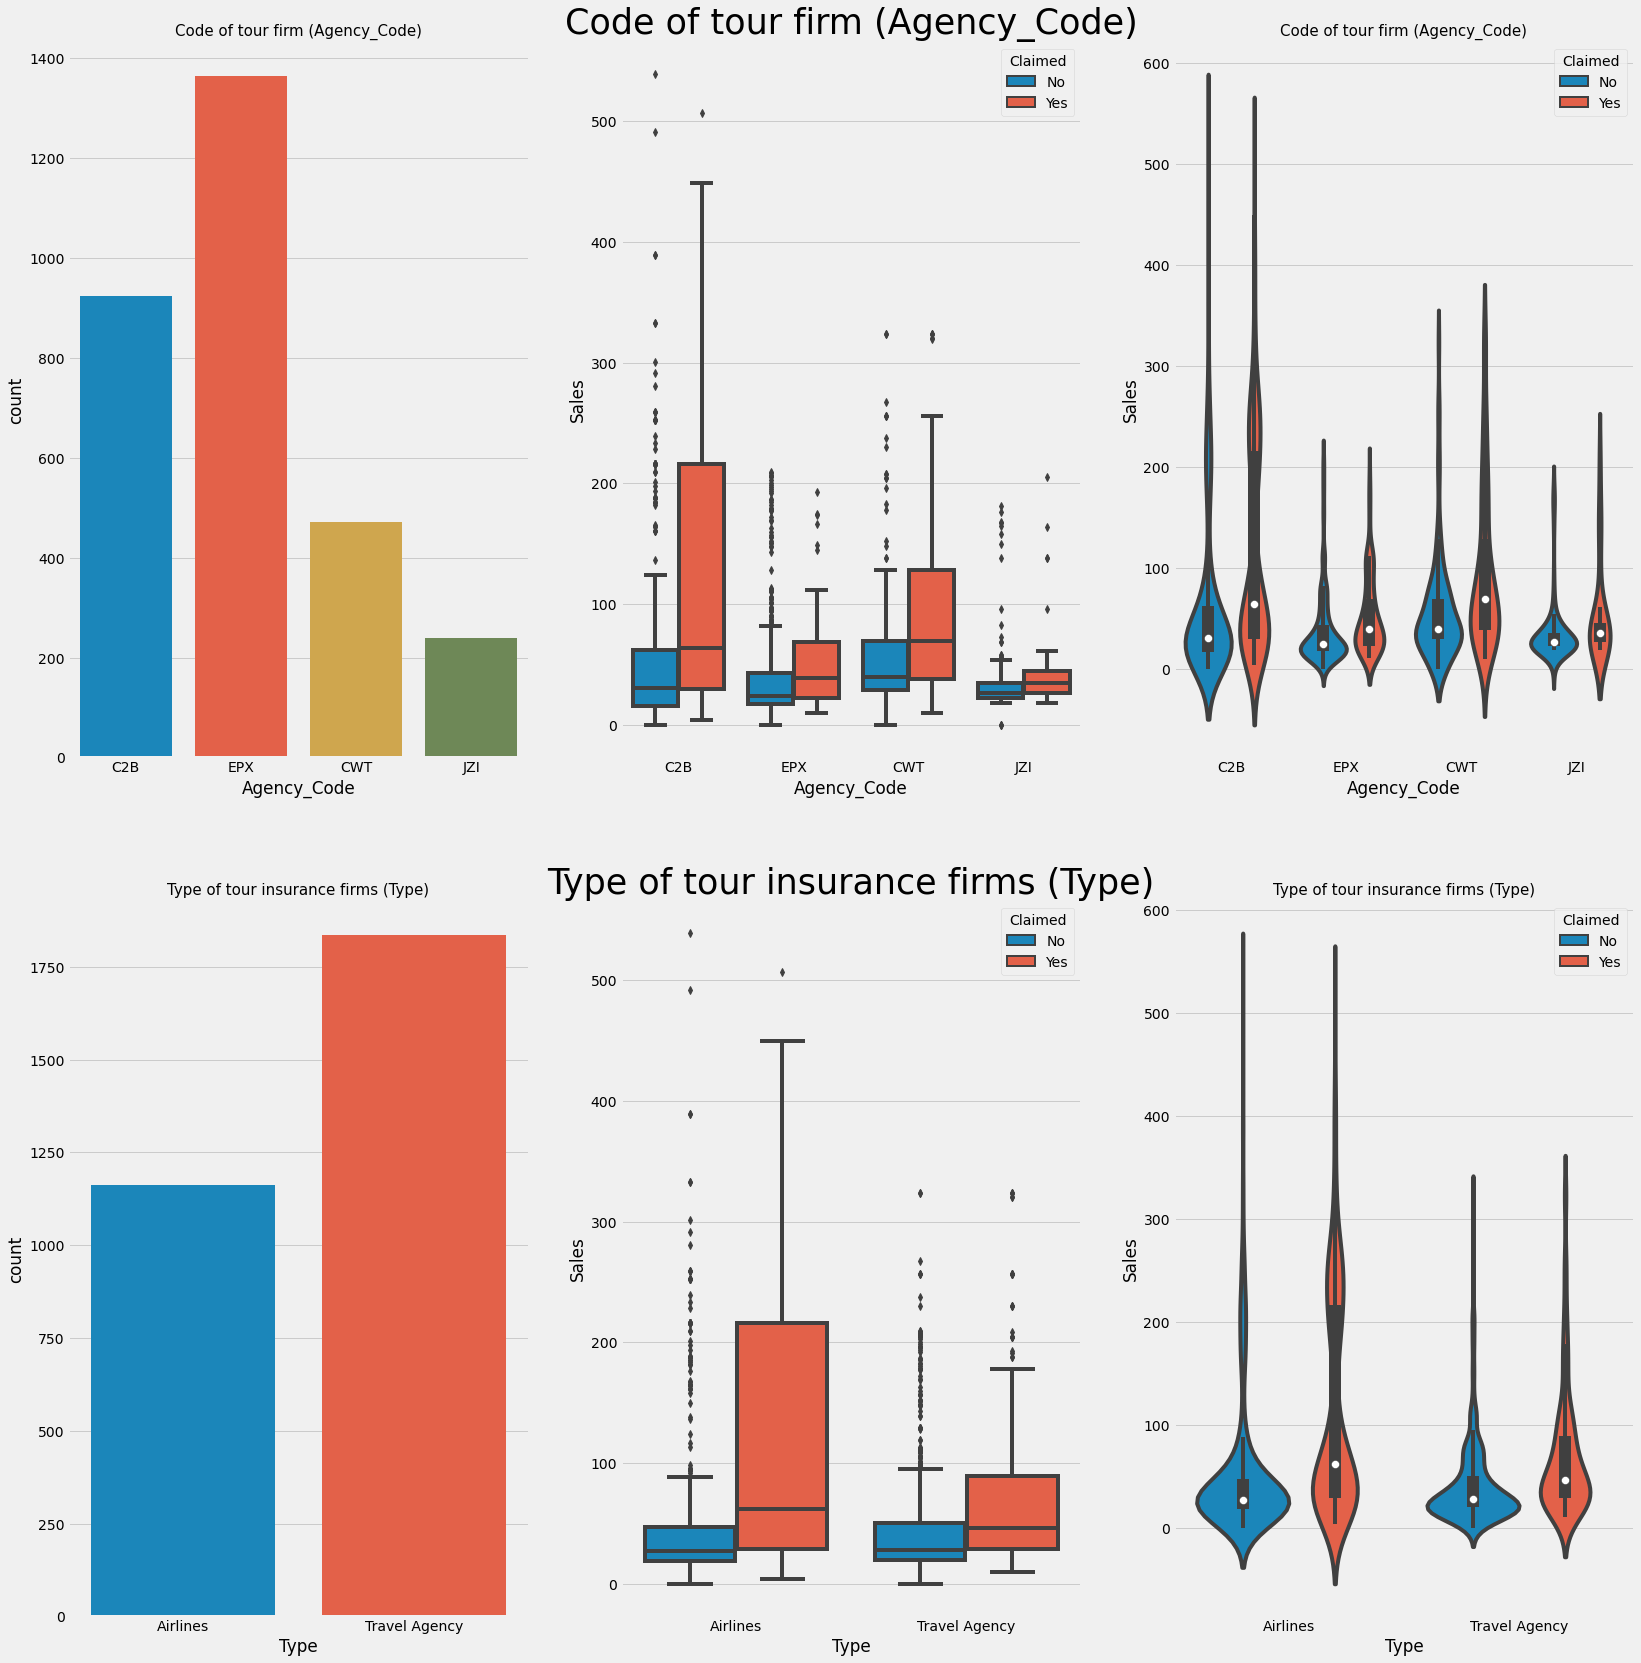

In [175]:
fig,axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(25, 27)
a = sns.countplot(data = ins_df, x ='Agency_Code',ax=axes[0][0])
a.set_title("Code of tour firm (Agency_Code)",fontsize=15)
a = sns.boxplot(data = ins_df, x='Agency_Code',y='Sales', hue='Claimed', ax=axes[0][1])
a.set_title("Code of tour firm (Agency_Code)",fontsize=35)
a = sns.violinplot(data = ins_df, x = 'Agency_Code',y='Sales',hue='Claimed', ax=axes[0][2])
a.set_title("Code of tour firm (Agency_Code)",fontsize=15)


a = sns.countplot(data = ins_df, x ='Type',ax=axes[1][0])
a.set_title("Type of tour insurance firms (Type)",fontsize=15)
a = sns.boxplot(data = ins_df, x='Type',y='Sales', hue='Claimed', ax=axes[1][1])
a.set_title("Type of tour insurance firms (Type)",fontsize=35)
a = sns.violinplot(data = ins_df, x = 'Type',y='Sales',hue='Claimed', ax=axes[1][2])
a.set_title("Type of tour insurance firms (Type)",fontsize=15)

plt.show();

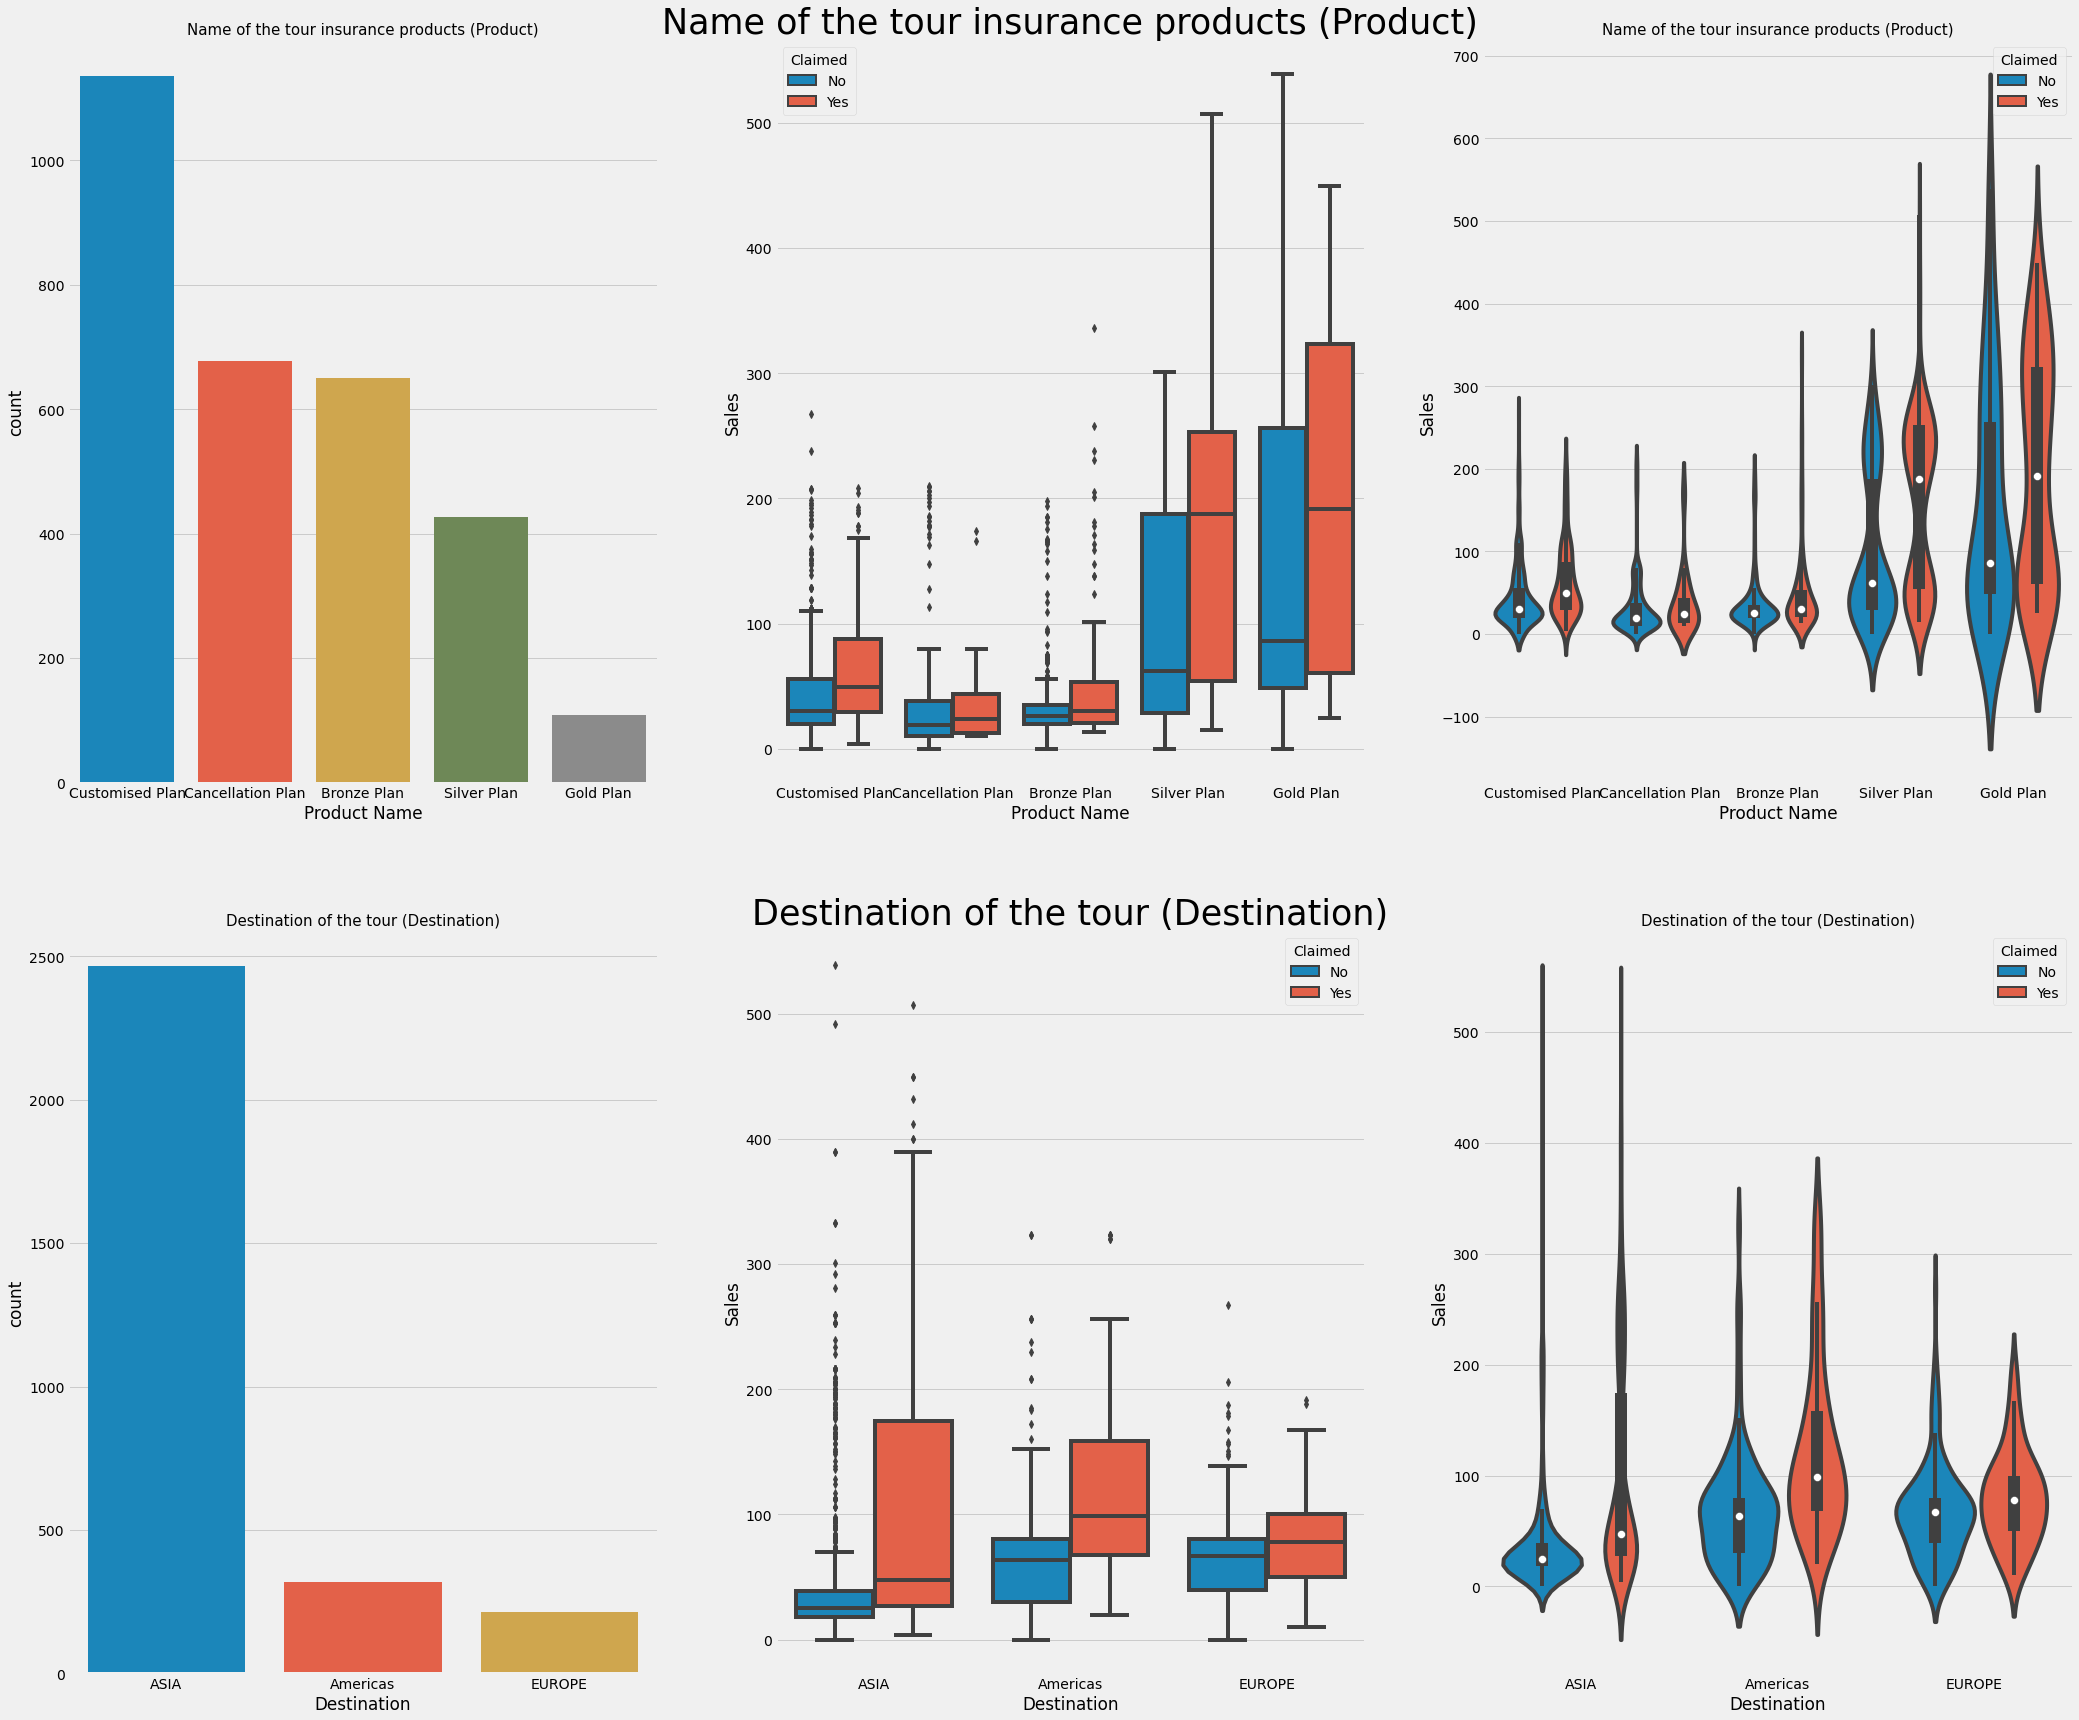

In [176]:
fig,axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(32, 28)

a = sns.countplot(data = ins_df, x ='Product Name',ax=axes[0][0])

a.set_title("Name of the tour insurance products (Product)",fontsize=15)

a = sns.boxplot(data = ins_df, x='Product Name',y='Sales', hue='Claimed', ax=axes[0][1])
a.set_title("Name of the tour insurance products (Product)",fontsize=35)

a = sns.violinplot(data = ins_df, x = 'Product Name',y='Sales',hue='Claimed', ax=axes[0][2])

a.set_title("Name of the tour insurance products (Product)",fontsize=15)


a = sns.countplot(data = ins_df, x ='Destination',ax=axes[1][0])
a.set_title("Destination of the tour (Destination)",fontsize=15)
a = sns.boxplot(data = ins_df, x='Destination',y='Sales', hue='Claimed', ax=axes[1][1])
a.set_title("Destination of the tour (Destination)",fontsize=35)
a = sns.violinplot(data = ins_df, x = 'Destination',y='Sales',hue='Claimed', ax=axes[1][2])
a.set_title("Destination of the tour (Destination)",fontsize=15)

plt.show();

### Checking patterns of the Data Using Pairplots

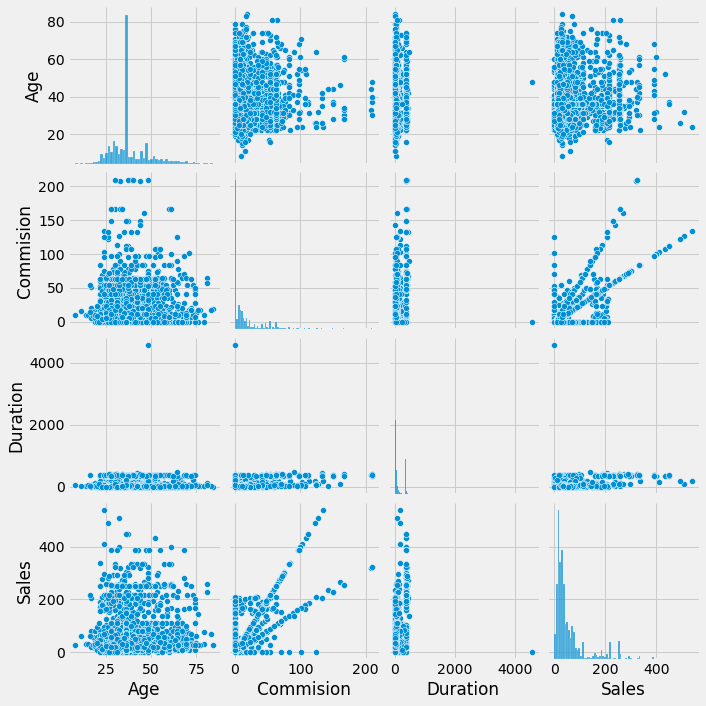

In [13]:
sns.pairplot(ins_df);

### Checking Correlations

In [14]:
corr = ins_df.corr()
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


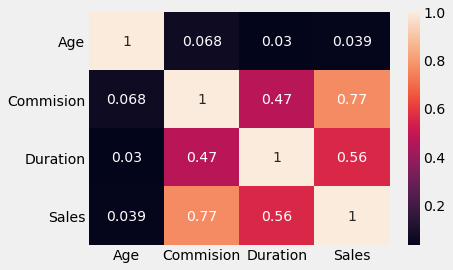

In [15]:
sns.heatmap(corr,annot=True);

### Geting unique counts of all Objects

In [16]:
print('Age \n',ins_df.Age.value_counts())
print('\n')
print('Agency_Code \n',ins_df.Agency_Code.value_counts())
print('\n')
print('Type \n',ins_df.Type.value_counts())
print('\n')
print('Claimed \n',ins_df.Claimed.value_counts())
print('\n')
print('Commision \n',ins_df.Commision.value_counts())
print('\n')
print('Channel \n',ins_df.Channel.value_counts())
print('\n')
print('Duration \n',ins_df.Duration.value_counts())
print('\n')
print('Sales \n',ins_df.Sales.value_counts())
print('\n')
print('Product Name \n',ins_df["Product Name"].value_counts())
print('\n')
print('Destination \n',ins_df.Destination.value_counts())

Age 
 36    999
31    125
48    108
30     96
35     94
     ... 
11      1
84      1
15      1
77      1
8       1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Commision 
 0.00     1366
63.21      62
54.00      61
23.76      61
7.70       57
         ... 
67.75       1
17.29       1
18.13       1
49.40       1
0.18        1
Name: Commision, Length: 324, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Duration 
  8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64


Sales 
 20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00      1
171.00      1
206.

### Note:
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 

The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [17]:
ins_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [18]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_df[feature].unique()))
        print(pd.Categorical(ins_df[feature].unique()).codes)
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


For each feature, look at the 2nd and 4th row to get the encoding mappings. Do not look at the line starting with 'Categories'

#### Comparing the unique counts from above

In [19]:
print('Age \n',ins_df.Age.value_counts())
print('\n')
print('Agency_Code \n',ins_df.Agency_Code.value_counts())
print('\n')
print('Type \n',ins_df.Type.value_counts())
print('\n')
print('Claimed \n',ins_df.Claimed.value_counts())
print('\n')
print('Commision \n',ins_df.Commision.value_counts())
print('\n')
print('Channel \n',ins_df.Channel.value_counts())
print('\n')
print('Duration \n',ins_df.Duration.value_counts())
print('\n')
print('Sales \n',ins_df.Sales.value_counts())
print('\n')
print('Product Name \n',ins_df["Product Name"].value_counts())
print('\n')
print('Destination \n',ins_df.Destination.value_counts())

Age 
 36    999
31    125
48    108
30     96
35     94
     ... 
11      1
84      1
15      1
77      1
8       1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Commision 
 0.00     1366
63.21      62
54.00      61
23.76      61
7.70       57
         ... 
67.75       1
17.29       1
18.13       1
49.40       1
0.18        1
Name: Commision, Length: 324, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Duration 
  8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64


Sales 
 20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00      1
171.00      1
206.60      1
271.00      1
Name: Sales, Length: 380

In [24]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [25]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


Label Encoding has been done and all columns are converted to number

### Proportion of 1s and 0s

In [26]:
print(ins_df.Claimed.value_counts(normalize=True))
print('%0s',ins_df.Claimed.value_counts()[0],'\n','%1s',ins_df.Claimed.value_counts()[1])

0    0.692
1    0.308
Name: Claimed, dtype: float64
%0s 2076 
 %1s 924


In [27]:
ld_df = ins_df

##  Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

<b> 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion

<b> We have done both the Questions combined

### Extracting the target column into separate vectors for training set and test set

In [28]:
X = ld_df.drop("Claimed", axis=1)

y = ld_df.pop("Claimed") 

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [30]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


### Building a Decision Tree Classifier

In [31]:
# Initialise a Decision Tree Classifier

dt_model = DecisionTreeClassifier()

In [32]:
# Fit the model
dt_model.fit(X_train, train_labels)


DecisionTreeClassifier()

In [33]:
from sklearn import tree

In [34]:
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

### Variable Importance

In [35]:
dt_model.feature_importances_

array([0.18111299, 0.19749693, 0.00301878, 0.07379897, 0.00726161,
       0.25993252, 0.21893306, 0.03825629, 0.02018886])

In [36]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                   Imp
Duration      0.259933
Sales         0.218933
Agency_Code   0.197497
Age           0.181113
Commision     0.073799
Product Name  0.038256
Destination   0.020189
Channel       0.007262
Type          0.003019


### Predicting Test Data

In [37]:

y_predict = dt_model.predict(X_test)

In [38]:
y_predict.shape

(900,)

In [39]:
y_predict

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

### Regularising the Decision Tree

### Adding Tuning Parameters

#### Executing 1st time Grid search CV  

In [67]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,30,50],
    'min_samples_leaf': [75,100,150,200], 
    'min_samples_split': [150,300,450],
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dt_model, param_grid = param_grid_dtcl, cv = 10)

In [68]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 75, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=75, min_samples_split=300,
                       random_state=1)

In [69]:
ytrain_predict = best_grid_dtcl.predict(X_train)
ytest_predict = best_grid_dtcl.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
print("Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1471
           1       0.65      0.60      0.62       629

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.78      0.78      0.78      2100

Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.71      0.52      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



#### Executing 2nd time Grid search CV  

In [71]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,30,50],
    'min_samples_leaf': [50,75,100,150], 
    'min_samples_split': [150,300,450],
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dt_model, param_grid = param_grid_dtcl, cv = 10)

In [72]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [73]:
ytrain_predict = best_grid_dtcl.predict(X_train)
ytest_predict = best_grid_dtcl.predict(X_test)

In [74]:
print("Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100

Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [75]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

### Generating New Tree

In [76]:
dt_tree_regularized = open('dt_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= dt_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

dt_tree_regularized.close()
dot_data

### Variable Importance

In [66]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))



                   Imp
Agency_Code   0.599363
Sales         0.255785
Product Name  0.056555
Duration      0.037945
Age           0.030261
Commision     0.012676
Type          0.007416
Channel       0.000000
Destination   0.000000


### Predicting on Training and Test dataset

In [77]:
# Complete the below code
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)



In [78]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2100,)
ytest_predict (900,)


### Getting the Predicted Classes

In [79]:
ytest_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

### Getting the Predicted Probabilities

In [80]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.93571429, 0.06428571],
       [0.52941176, 0.47058824],
       [0.35862069, 0.64137931],
       ...,
       [0.35862069, 0.64137931],
       [0.88405797, 0.11594203],
       [0.88405797, 0.11594203]])

In [81]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.529412,0.470588
2,0.358621,0.641379
3,0.234783,0.765217
4,0.924242,0.075758


## DECISION TREE Model Evaluation

### Measuring AUC-ROC Curve

In [82]:
import matplotlib.pyplot as plt

### AUC and ROC for the training data

In [83]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

AUC: 0.836


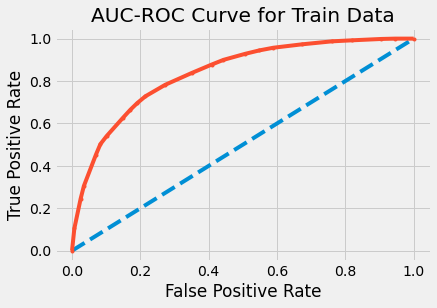

In [107]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('DT-Model AUC-ROC Curve for Train Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

### AUC and ROC for the test data

AUC - Test 0.7940860064434795


Text(0, 0.5, 'True Positive Rate')

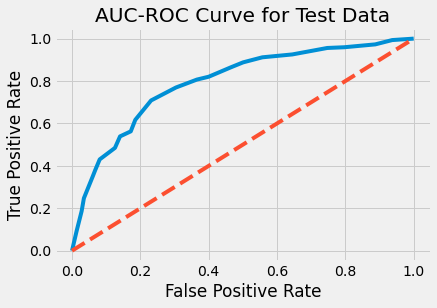

In [108]:
# predict probabilities
probs_test = reg_dt_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:,1]

# calculate AUC
auc_test = roc_auc_score(test_labels,probs_test)
print('AUC - Test', auc_test)
# calculate roc curve
fpr_test,tpr_test,thresh_test = roc_curve(test_labels,probs_test)

# plot the roc curve for the model
plt.style.use('fivethirtyeight')
g = sns.lineplot(x = fpr_test, y = tpr_test)
g.plot([0,1],[0,1], linestyle = 'dashed');
plt.title('DT-Model AUC-ROC Curve for Test Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


### Confusion Matrix for the training data of Decision Tree

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [88]:

confusion_matrix(train_labels,ytrain_predict)


array([[1349,  122],
       [ 313,  316]], dtype=int64)

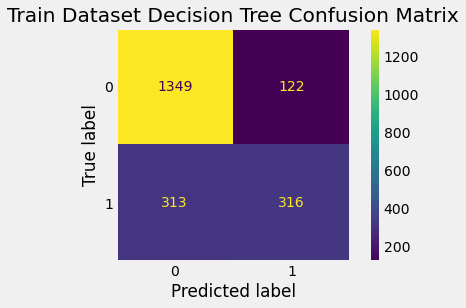

In [106]:
# well formatted confusion matrix output
plot_confusion_matrix(reg_dt_model,X_train, train_labels);
plt.title('Train Dataset Decision Tree Confusion Matrix')
plt.grid(b = False, which = 'both', axis = 'both');

In [91]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7928571428571428

In [103]:
# Identical results if we manually calculate from CMatrix
print((316+1349)/(316+122+313+1349))

0.7928571428571428


In [104]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



### Confusion Matrix for test data of Decision Tree

In [94]:
confusion_matrix(test_labels, ytest_predict)

array([[564,  41],
       [183, 112]], dtype=int64)

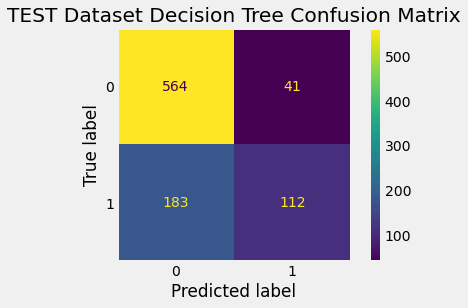

In [105]:
plot_confusion_matrix(reg_dt_model, X_test, test_labels)
plt.title('TEST Dataset Decision Tree Confusion Matrix')
plt.grid(b = False, which = 'both', axis = 'both');

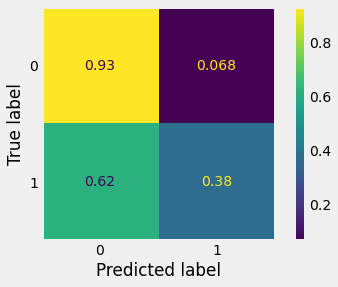

In [96]:
plot_confusion_matrix(reg_dt_model, X_test, test_labels,
                     normalize = 'true')
plt.grid(b = False, which = 'both', axis = 'both');

In [97]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.7511111111111111

In [98]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [109]:
print("Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100

Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



#### Conclusion

Accuracy on the Training Data: 79%  
Accuracy on the Test Data: 75%

AUC on the Training Data: 83%  
AUC on the Test: 80%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.  
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

### Random Forest Classifier

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100,
                              max_features=4,
                              random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [130]:
rfcl

RandomForestClassifier(max_features=4, random_state=1)

In [131]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [132]:
rfcl.score(X_train,train_labels)

0.9947619047619047

<b> Random Forest Classifier accracy score is very high so we will tune all the Parameters using Grid serch CV

### Executing Grid Search Cv for RF Modal for first Time

In [135]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5,6],
    'max_features': [4,5],
    'min_samples_leaf': [11,15],
    'min_samples_split': [50,55],
    'n_estimators': [290,350,400]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 2)

In [136]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6], 'max_features': [4, 5],
                         'min_samples_leaf': [11, 15],
                         'min_samples_split': [50, 55],
                         'n_estimators': [290, 350, 400]})

In [137]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 290}

In [138]:
best_grid = grid_search.best_estimator_

#### Predicting Training and Test Data

In [139]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [141]:
print("Random Forest Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Random Forest Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Random Forest Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.59      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100

Random Forest Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



### Executing Grid Search Cv for RF Modal for first Time

In [143]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [30,40],
    'max_features': [5,8,9],
    'min_samples_leaf': [11,50,100],
    'min_samples_split': [55,60,70], 
    'n_estimators': [100,200,350] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [144]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [30, 40], 'max_features': [5, 8, 9],
                         'min_samples_leaf': [11, 50, 100],
                         'min_samples_split': [55, 60, 70],
                         'n_estimators': [100, 200, 350]})

In [145]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 11,
 'min_samples_split': 55,
 'n_estimators': 200}

In [146]:
best_grid = grid_search.best_estimator_

In [147]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [148]:
print("Random Forest Classification report for Train Dataset","\n",classification_report(train_labels,ytrain_predict))
print("Random Forest Classification report for Test Dataset","\n",classification_report(test_labels,ytest_predict))

Random Forest Classification report for Train Dataset 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.61      0.66       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100

Random Forest Classification report for Test Dataset 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



### Performance Evaluation of Random Forest Classifier

#### Random Forest Classifier TRAIN DATA Confusion Matrix

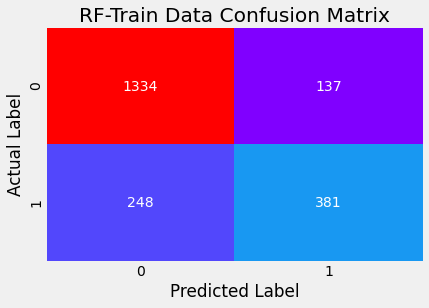

In [152]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('RF-Train Data Confusion Matrix')
plt.show()

#### Random forest Model ROC Curve of Train data

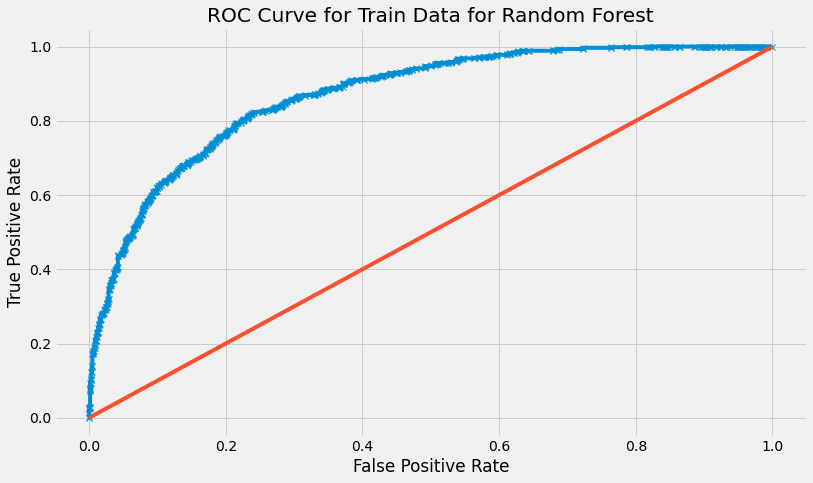

Area under Curve is 0.869469521506951


In [158]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data for Random Forest')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

#### Random Forest Confusion Matrix of Test data

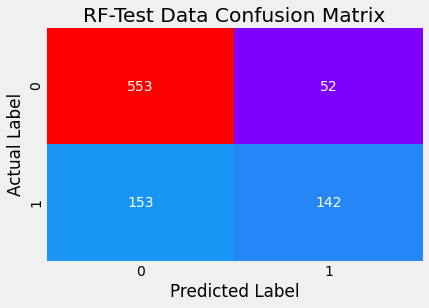

In [156]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('RF-Test Data Confusion Matrix')
plt.show()

In [157]:
best_grid.score(X_test,test_labels)

0.7722222222222223

#### Random Forest ROC Curve of Test data

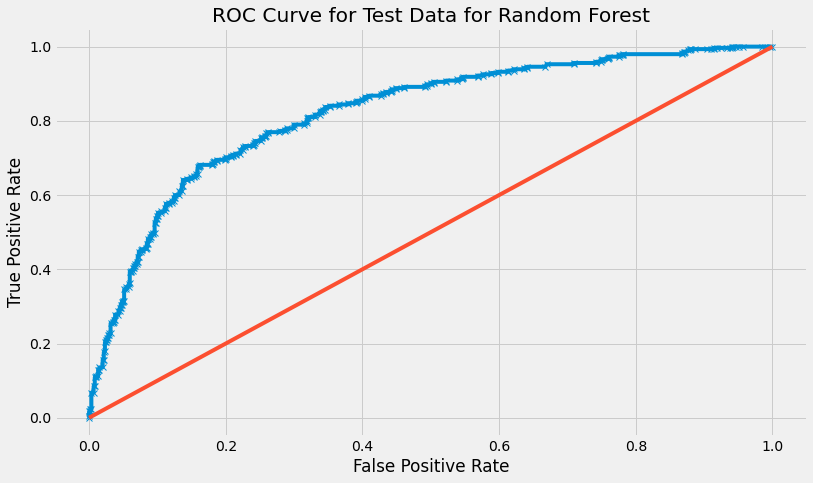

Area under Curve is 0.8211430172293037


In [159]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data for Random Forest')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

### Result:

Random Forest Train Set &	Random Forest Test Set
<b>Accuracy	0.82,	0.77
AUC      	0.87,	0.83
Recall	       0.61,	0.48
Precision	0.74,	0.73
F1 Score	0.66,	0.58


From the Random Forest model,looking at the Accuracy,Sensitivity,Specificity,Recall and AUC, Train and Test data are almost Similar so this is optimized model


# ARTIFICIAL NEURAL NETWORK analysis is shown in seperate jupter file please refer to that 